# RECOMIENDAME UNA PELI
(**Base de datos TMDB para peliculas en inglés**)
___
___

## 1 Insumos

[//]: <$\sum_{n=1}^{10}n>
___

### 1.1 Carga de librerias y accesos.

In [74]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string as strg
from ast import literal_eval
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Acceso a la carpeta donde esta la base
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/Colab Notebooks/_Soporte'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/_Soporte


In [3]:
%ls -al

total 410957
-rw------- 1 root root       143 Apr 17 20:31  1.1_input_dataset.gsheet
-rw------- 1 root root  23351072 Apr 30 14:38  5000_movies.csv
-rw------- 1 root root       143 May 12 20:29  5000_movies.gsheet
-rw------- 1 root root  23351072 May 12 20:27 'Copy of 5000_movies.csv'
-rw------- 1 root root       143 Apr 29 05:07 'Copy of Solicitud correo.gslides'
-rw------- 1 root root 318444025 May 12 22:51  data.csv
-rw------- 1 root root   3133298 May 12 20:37  _movies.csv
-rw------- 1 root root   3252185 May  7 14:46  movies.csv
-rw------- 1 root root       143 May 12 20:36  movies.gsheet
-rw------- 1 root root   3456554 May 12 22:46  _npl_movies.csv
-rw------- 1 root root     28805 Apr 29 19:06  Proyecto_ejemplo.ipynb
-rw------- 1 root root       143 Apr 17 17:29  requirements.txt.gdoc
drwx------ 2 root root      4096 Apr 24 02:41  respaldos/
-rw------- 1 root root     50262 Apr 18 16:16  Scatterplot.ipynb
-rw------- 1 root root  40044293 Apr 25 13:48  tmdb_5000_credits.csv
-rw--

In [4]:
# Carga e impresión del dataset
df = pd.read_csv('_movies.csv', index_col=0)
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,release_date,...,runtime,status,tagline,title,vote_average,vote_count,cast,director,production,prod_countries
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,...,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]"
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,...,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America]
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,...,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]"


In [5]:
# Resumen
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4803 non-null   int64  
 1   genres             4803 non-null   object 
 2   homepage           1712 non-null   object 
 3   id                 4803 non-null   int64  
 4   keywords           4803 non-null   object 
 5   original_language  4803 non-null   object 
 6   original_title     4803 non-null   object 
 7   overview           4799 non-null   object 
 8   popularity         4803 non-null   float64
 9   release_date       4802 non-null   object 
 10  revenue            4803 non-null   int64  
 11  runtime            4801 non-null   float64
 12  status             4803 non-null   object 
 13  tagline            3959 non-null   object 
 14  title              4803 non-null   object 
 15  vote_average       4803 non-null   float64
 16  vote_count         4803 

In [6]:
# Proporción de nulos
df.isnull().sum()/df.shape[0]*100

budget                0.000000
genres                0.000000
homepage             64.355611
id                    0.000000
keywords              0.000000
original_language     0.000000
original_title        0.000000
overview              0.083281
popularity            0.000000
release_date          0.020820
revenue               0.000000
runtime               0.041641
status                0.000000
tagline              17.572351
title                 0.000000
vote_average          0.000000
vote_count            0.000000
cast                  0.000000
director              0.624610
production            0.000000
prod_countries        0.000000
dtype: float64

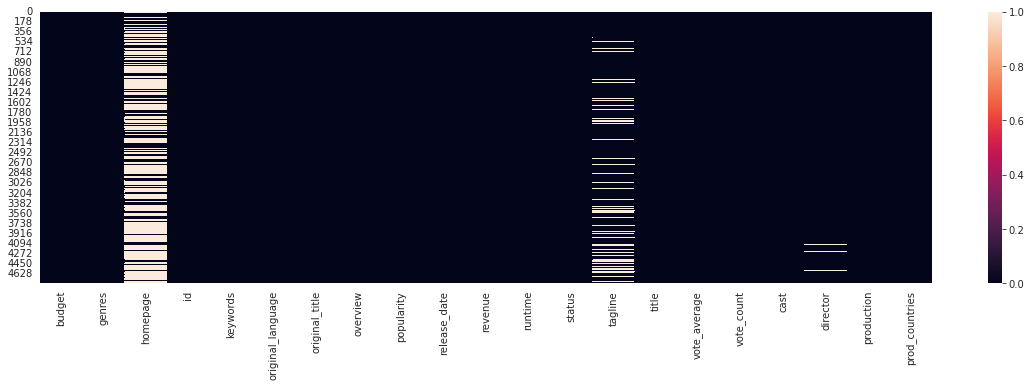

In [7]:
plt.figure(figsize = (20,5))
sns.set_style("dark")
sns.heatmap(df.isnull())

In [8]:
# Proporción de repetidos
df.nunique()/df.shape[0]*100

budget                 9.077660
genres                15.531959
homepage              35.207162
id                   100.000000
keywords              87.403706
original_language      0.770352
original_title        99.958359
overview              99.916719
popularity            99.979180
release_date          68.290652
revenue               68.644597
runtime                3.247970
status                 0.062461
tagline               82.115345
title                 99.937539
vote_average           1.478243
vote_count            33.499896
cast                  97.793046
director              48.906933
production            74.973975
prod_countries         9.285863
dtype: float64

In [9]:
# Proporción de ceros
(df == 0).sum()/df.shape[0]*100

budget               21.590672
genres                0.000000
homepage              0.000000
id                    0.000000
keywords              0.000000
original_language     0.000000
original_title        0.000000
overview              0.000000
popularity            0.020820
release_date          0.000000
revenue              29.710598
runtime               0.728711
status                0.000000
tagline               0.000000
title                 0.000000
vote_average          1.311680
vote_count            1.290860
cast                  0.000000
director              0.000000
production            0.000000
prod_countries        0.000000
dtype: float64

In [10]:
# Estadísticos principales
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [11]:
# Idiomas
df['original_language'].value_counts().head(15)

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
Name: original_language, dtype: int64

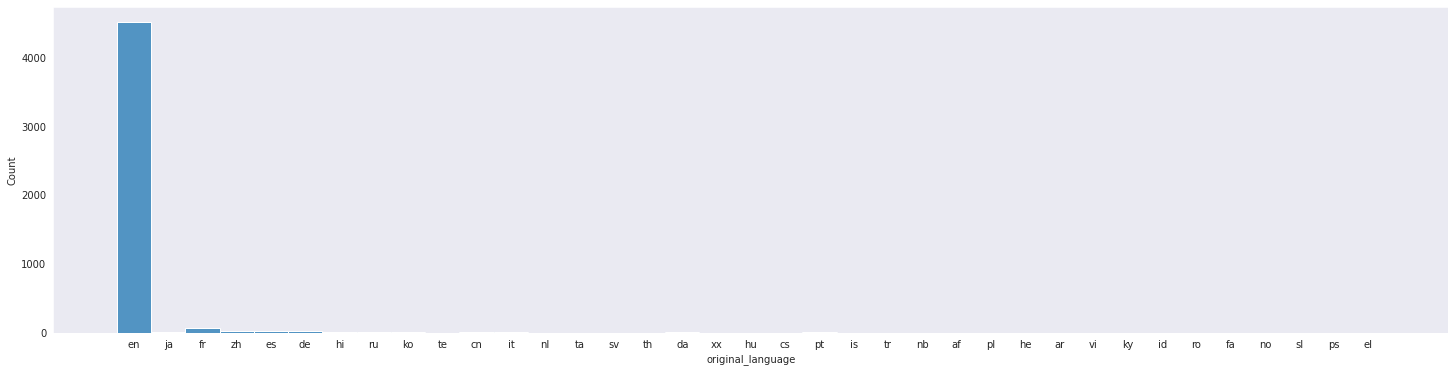

In [12]:
plt.figure(1, figsize = (25,6))
sns.histplot(data = df['original_language'])

In [13]:
# Estatus
df['status'].value_counts().head(15)

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

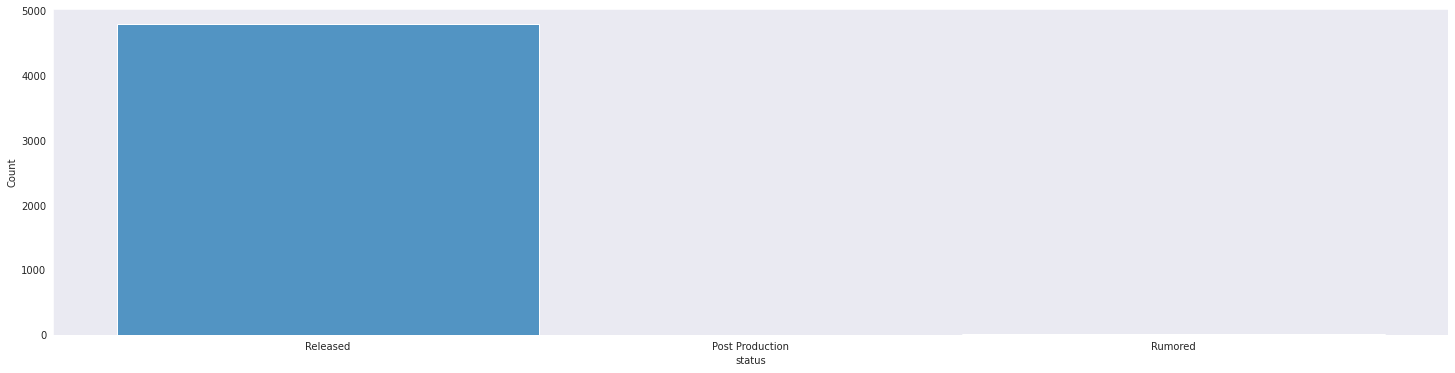

In [14]:
plt.figure(1, figsize = (25,6))
sns.histplot(data = df['status'])

> **Primeros hallazgos**.
 
* Campos por retirar:
    * El campo homepage tiene 64% de nulos.
    * El título original, puede presentar caracteres especiales.
    * EL ID, ya que no presenta repetidos.
    * Lenguaje original, inglés es la variable predominante.
    * Stratus, la mayoria estan publicadas.
 
* Campos por transformar:
    * Los nulos de las variables de texto
        * Los nulos serán sustituidos por "".
        * Se eliminaran las comillas simples de las arreglos.
        * Se unificarán en un nuevo campo.
    * Pasar fecha al campo correspondientes.
 
* Registros por retirar:
    * Nulos dentro de variables numéricas, menos del 1%.
    * Los atípicos en las variables numéricas serán retirados.

___
___



## 2 Limpieza
___

### 2.1 Selección y transformación de variables

In [15]:
# Formato de fechas en lugar de cadenas de carateres (strings) 
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

In [16]:
# Eliminar variables
df = df.drop(columns = ['id', 'homepage', 'original_title', 'release_date', 'original_language', 'status']) 

In [17]:
# Re-iniciar el consecutivo del índice
df = df.reset_index(drop=True)

In [18]:
df.head()

,budget,genres,keywords,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,cast,director,production,prod_countries,year
0,237000000,"[Action, Adventure, Fantasy]","[culture clash, future, space war]","In the 22nd century, a paraplegic Marine is di...",150.437577,2787965087,162.0,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009.0
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]","Captain Barbossa, long believed to be dead, ha...",139.082615,961000000,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007.0
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent]",A cryptic message from Bond’s past sends him o...,107.376788,880674609,148.0,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015.0
3,250000000,"[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Following the death of District Attorney Harve...,112.312950,1084939099,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012.0
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]","John Carter is a war-weary, former military ca...",43.926995,284139100,132.0,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,[Walt Disney Pictures],[United States of America],2012.0


### 2.2 Gestión de nulos

In [19]:
# Vacios ("") en vez de nulos en los datos de texto 
obj_df = df[list(df.columns[df.dtypes == object])]
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   genres          4803 non-null   object
 1   keywords        4803 non-null   object
 2   overview        4799 non-null   object
 3   tagline         3959 non-null   object
 4   title           4803 non-null   object
 5   cast            4803 non-null   object
 6   director        4773 non-null   object
 7   production      4803 non-null   object
 8   prod_countries  4803 non-null   object
dtypes: object(9)
memory usage: 337.8+ KB


In [20]:
for columna in obj_df:
    df[columna] = df[columna].replace(np.nan,'')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          4803 non-null   int64  
 1   genres          4803 non-null   object 
 2   keywords        4803 non-null   object 
 3   overview        4803 non-null   object 
 4   popularity      4803 non-null   float64
 5   revenue         4803 non-null   int64  
 6   runtime         4801 non-null   float64
 7   tagline         4803 non-null   object 
 8   title           4803 non-null   object 
 9   vote_average    4803 non-null   float64
 10  vote_count      4803 non-null   int64  
 11  cast            4803 non-null   object 
 12  director        4803 non-null   object 
 13  production      4803 non-null   object 
 14  prod_countries  4803 non-null   object 
 15  year            4802 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 600.5+ KB


In [21]:
# Eliminar registros con nulos en variables numéricas
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          4800 non-null   int64  
 1   genres          4800 non-null   object 
 2   keywords        4800 non-null   object 
 3   overview        4800 non-null   object 
 4   popularity      4800 non-null   float64
 5   revenue         4800 non-null   int64  
 6   runtime         4800 non-null   float64
 7   tagline         4800 non-null   object 
 8   title           4800 non-null   object 
 9   vote_average    4800 non-null   float64
 10  vote_count      4800 non-null   int64  
 11  cast            4800 non-null   object 
 12  director        4800 non-null   object 
 13  production      4800 non-null   object 
 14  prod_countries  4800 non-null   object 
 15  year            4800 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 637.5+ KB


### 2.3  Gestión de atípicos

In [22]:
num_df = df[list(df.columns[df.dtypes != object])]

for col in num_df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[f'flag_{col}'] = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4800 non-null   int64  
 1   genres             4800 non-null   object 
 2   keywords           4800 non-null   object 
 3   overview           4800 non-null   object 
 4   popularity         4800 non-null   float64
 5   revenue            4800 non-null   int64  
 6   runtime            4800 non-null   float64
 7   tagline            4800 non-null   object 
 8   title              4800 non-null   object 
 9   vote_average       4800 non-null   float64
 10  vote_count         4800 non-null   int64  
 11  cast               4800 non-null   object 
 12  director           4800 non-null   object 
 13  production         4800 non-null   object 
 14  prod_countries     4800 non-null   object 
 15  year               4800 non-null   float64
 16  flag_budget        4800 

In [23]:
bool_df = df[list(df.columns[df.dtypes == bool])]

for col in bool_df:
    ind_out = df[df[col]].index
    df.drop(ind_out, inplace=True)
    print(df.shape)

(4479, 23)
(4331, 23)
(4174, 23)
(4037, 23)
(3904, 23)
(3790, 23)
(3569, 23)


In [24]:
df = df.drop(columns = ['flag_budget', 'flag_popularity', 'flag_revenue',
       'flag_runtime', 'flag_vote_average', 'flag_vote_count', 'flag_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 83 to 4802
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3569 non-null   int64  
 1   genres          3569 non-null   object 
 2   keywords        3569 non-null   object 
 3   overview        3569 non-null   object 
 4   popularity      3569 non-null   float64
 5   revenue         3569 non-null   int64  
 6   runtime         3569 non-null   float64
 7   tagline         3569 non-null   object 
 8   title           3569 non-null   object 
 9   vote_average    3569 non-null   float64
 10  vote_count      3569 non-null   int64  
 11  cast            3569 non-null   object 
 12  director        3569 non-null   object 
 13  production      3569 non-null   object 
 14  prod_countries  3569 non-null   object 
 15  year            3569 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 474.0+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


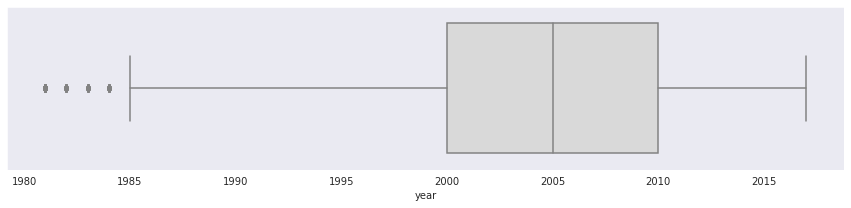

In [25]:
plt.figure(figsize = (15,3))
sns.boxplot(df['year'], color='0.85')

> Se conservan cerca del 80% de los registros en favor de la calidad de la información. 

Cuidado, es posible encontrar "nuevos atípicos" después hacer la depuración correspondiente.

___
___

## 3 Análisis exploratorio de los datos (EDA)
___

In [26]:
num_df = df[list(df.columns[df.dtypes != object])]

num_df.sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,year
2436,0,2.897449,0,120.0,5.5,19,2004.0
2609,15000000,6.373316,9237470,118.0,6.5,85,2002.0
1469,70000000,3.276912,11263966,101.0,5.3,29,1999.0
1592,30000000,11.196020,45892212,125.0,6.2,243,1989.0
2698,14000000,4.667230,10424470,86.0,5.3,73,2001.0


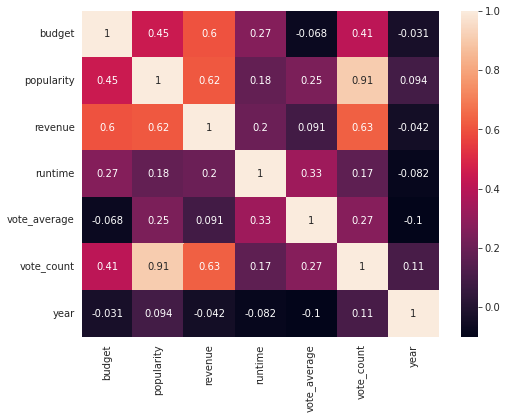

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(num_df.corr(), annot=True)
plt.show()

In [28]:
df.columns

Index(['budget', 'genres', 'keywords', 'overview', 'popularity', 'revenue',
       'runtime', 'tagline', 'title', 'vote_average', 'vote_count', 'cast',
       'director', 'production', 'prod_countries', 'year'],
      dtype='object')

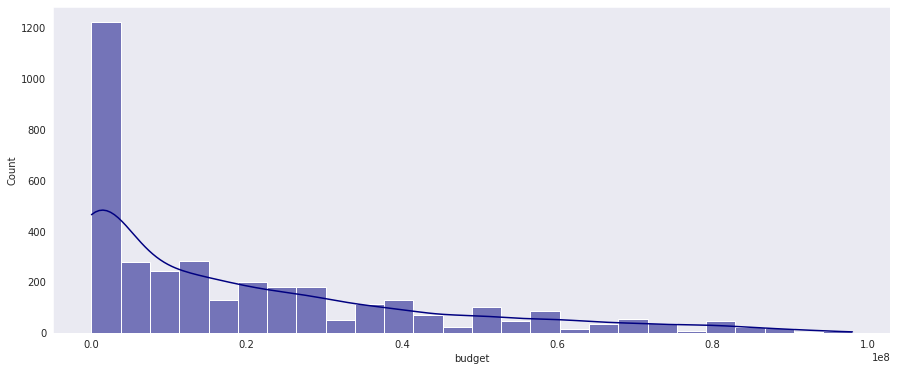

In [29]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['budget'], color="navy", kde=True)

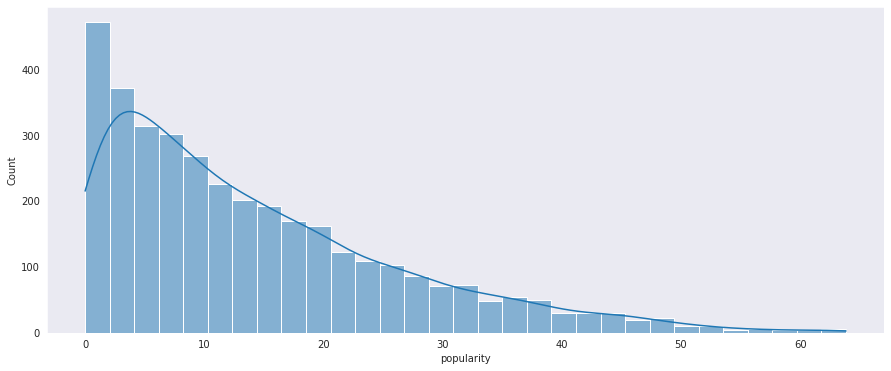

In [30]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['popularity'], kde=True)

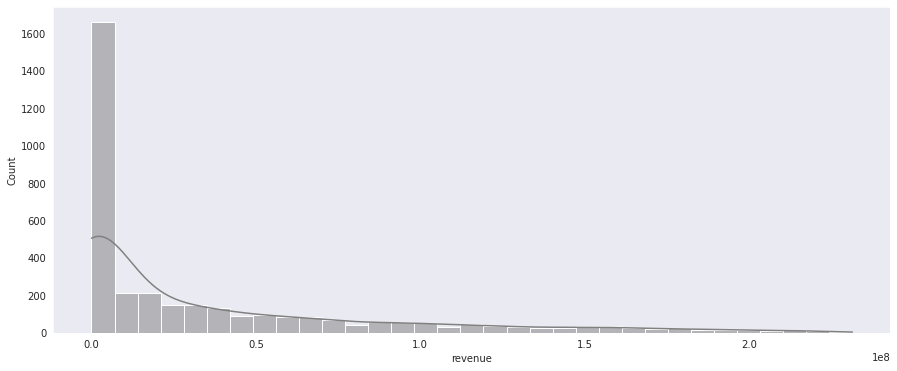

In [31]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['revenue'], color="grey", kde=True)

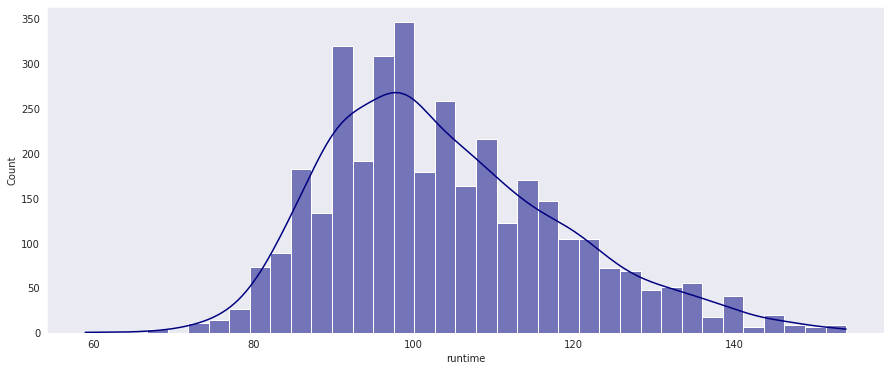

In [32]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['runtime'], color="navy", kde=True)

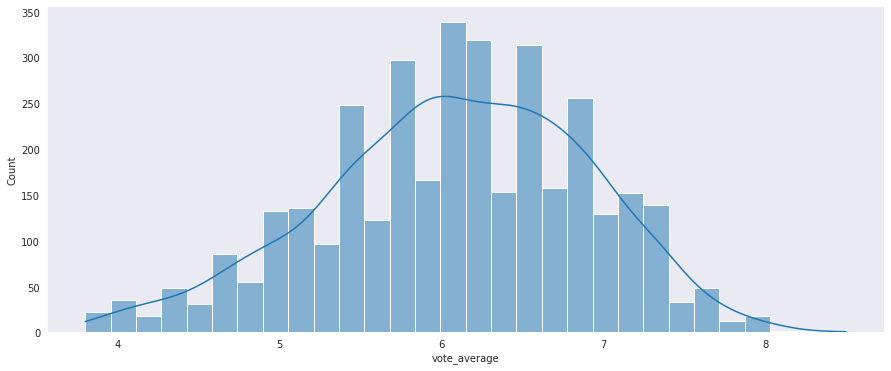

In [33]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['vote_average'], kde=True)

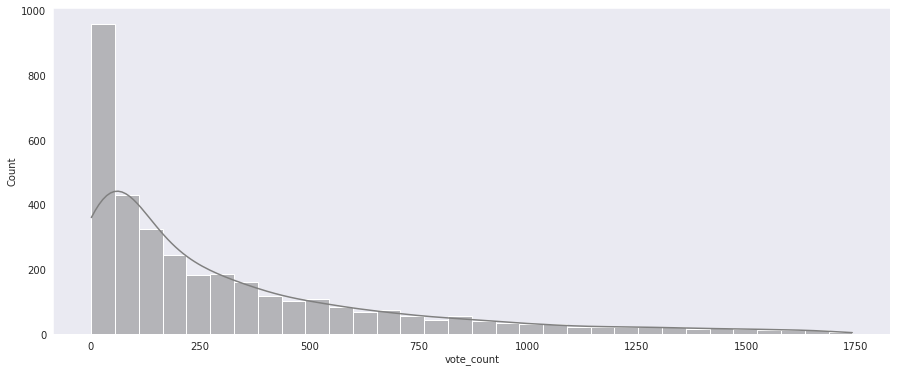

In [34]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['vote_count'], color="gray", kde=True)

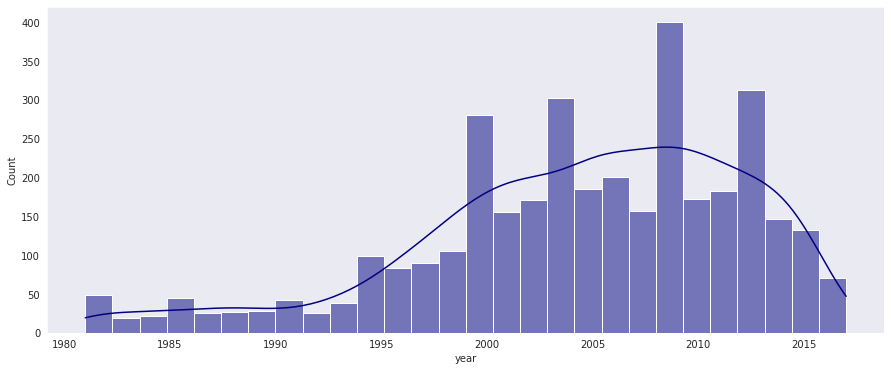

In [35]:
plt.figure(figsize=(15, 6))
sns.histplot(data = df['year'], color="navy", kde=True)

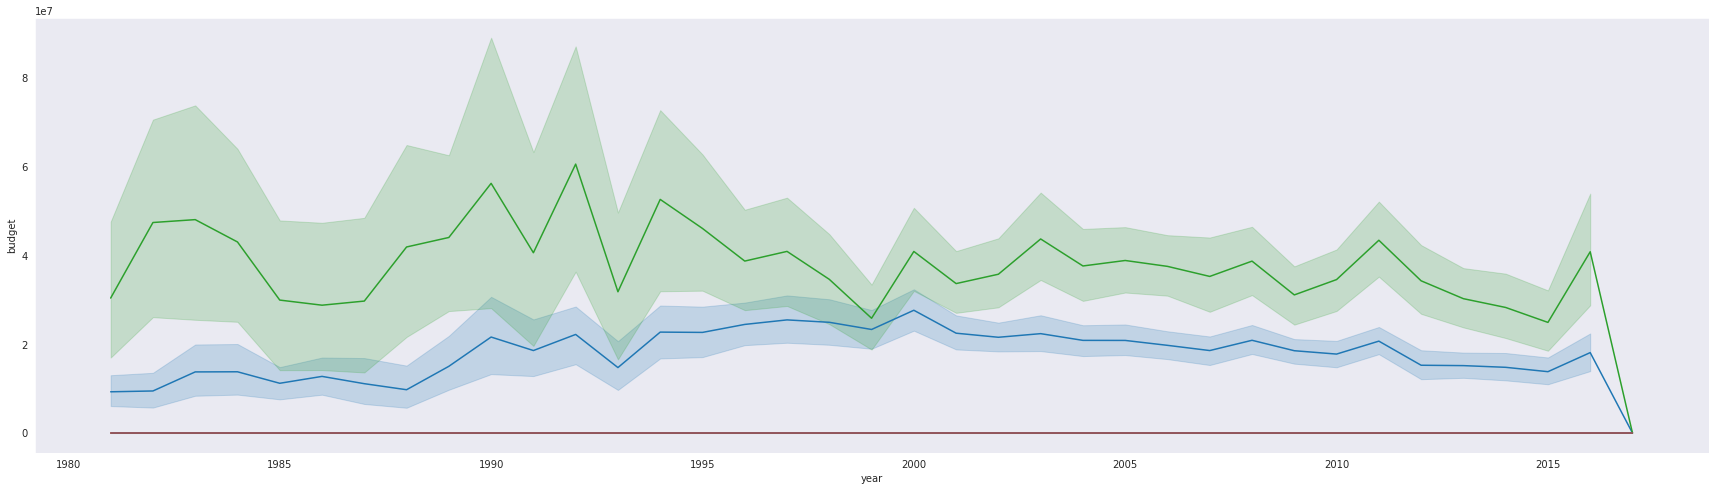

In [36]:
plt.figure(figsize=(30, 8))

for col in num_df.drop(columns=['year']):
    sns.lineplot(data=df, x=df['year'], y=df[col])

In [37]:
(df == 0).sum()/df.shape[0]*100

budget            23.928271
genres             0.000000
keywords           0.000000
overview           0.000000
popularity         0.000000
revenue           33.818997
runtime            0.000000
tagline            0.000000
title              0.000000
vote_average       0.000000
vote_count         0.000000
cast               0.000000
director           0.000000
production         0.000000
prod_countries     0.000000
year               0.000000
dtype: float64

> Revisar fuentes antes de compartir hallazgos, y validar los casos donde el presupuesto y el ingreso sean distintos de cero.

___
___

## 4 Procesamiento de lenguaje natural
___

### 4.1 Pre procesamiento

In [38]:
text_df = df[list(df.columns[df.dtypes == object])]
text_df.sample(3)

,genres,keywords,overview,tagline,title,cast,director,production,prod_countries
3363,"[Comedy, Drama, Mystery]",[independent film],"A movie spun out of equal parts folk tale, fab...",Every secret dies somewhere.,Get Low,"[Bill Murray, Sissy Spacek, Robert Duvall]",Aaron Schneider,"[K5 International, Zanuck Independent, David G...",[United States of America]
1626,"[Fantasy, Drama, Action]","[new york, flying, ex-boyfriend]",When New York architect Matt Saunders dumps hi...,Hell hath no fury like a superwoman scorned.,My Super Ex-Girlfriend,"[Uma Thurman, Luke Wilson, Anna Faris]",Ivan Reitman,"[Regency Enterprises, New Regency Pictures, Pa...",[United States of America]
2133,[Drama],"[terror, loss of mother, gun]",Tragedy strikes a married couple on vacation i...,If You Want to be Understood...Listen,Babel,"[Brad Pitt, Cate Blanchett, Gael García Bernal]",Alejandro González Iñárritu,"[Paramount Vantage, Media Rights Capital, Anon...","[France, Japan, Mexico]"


In [39]:
df['text'] = ""

for col in text_df:
    df['text'] = df['text'] + ' ' + df[col]

df['text']

83       [Action, Adventure, Science Fiction] [] The L...
97       [Action, Adventure, Drama] [monster, godzilla...
151      [Adventure, Action, Animation] [denmark, nord...
235      [Fantasy, Adventure, Comedy] [competition, gr...
265      [Comedy, Fantasy, Family] [cat, brother siste...
                              ...                        
4798     [Action, Crime, Thriller] [united states–mexi...
4799     [Comedy, Romance] [] A newlywed couple's hone...
4800     [Comedy, Drama, Romance] [date, love at first...
4801     [] [] When ambitious New York attorney Sam is...
4802     [Documentary] [obsession, camcorder, crush] E...
Name: text, Length: 3569, dtype: object

In [40]:
df['text'] = df['text'].str.lower()
df['text']

83       [action, adventure, science fiction] [] the l...
97       [action, adventure, drama] [monster, godzilla...
151      [adventure, action, animation] [denmark, nord...
235      [fantasy, adventure, comedy] [competition, gr...
265      [comedy, fantasy, family] [cat, brother siste...
                              ...                        
4798     [action, crime, thriller] [united states–mexi...
4799     [comedy, romance] [] a newlywed couple's hone...
4800     [comedy, drama, romance] [date, love at first...
4801     [] [] when ambitious new york attorney sam is...
4802     [documentary] [obsession, camcorder, crush] e...
Name: text, Length: 3569, dtype: object

In [41]:
df['text'] = df['text'].apply(
    lambda linea: linea.translate(str.maketrans('', '', strg.punctuation))
    )
df['text']

83       action adventure science fiction  the lovers ...
97       action adventure drama monster godzilla giant...
151      adventure action animation denmark nordic myt...
235      fantasy adventure comedy competition greece c...
265      comedy fantasy family cat brother sister rela...
                              ...                        
4798     action crime thriller united states–mexico ba...
4799     comedy romance  a newlywed couples honeymoon ...
4800     comedy drama romance date love at first sight...
4801       when ambitious new york attorney sam is sen...
4802     documentary obsession camcorder crush ever si...
Name: text, Length: 3569, dtype: object

In [42]:
df['text'] = df['text'].apply(lambda registro: registro.split())
df['text']

83      [action, adventure, science, fiction, the, lov...
97      [action, adventure, drama, monster, godzilla, ...
151     [adventure, action, animation, denmark, nordic...
235     [fantasy, adventure, comedy, competition, gree...
265     [comedy, fantasy, family, cat, brother, sister...
                              ...                        
4798    [action, crime, thriller, united, states–mexic...
4799    [comedy, romance, a, newlywed, couples, honeym...
4800    [comedy, drama, romance, date, love, at, first...
4801    [when, ambitious, new, york, attorney, sam, is...
4802    [documentary, obsession, camcorder, crush, eve...
Name: text, Length: 3569, dtype: object

In [43]:
df['text'] = df['text'].apply(
    lambda registro: [palabra for palabra in registro if palabra not in set(stopwords.words('english'))]
    )

df['text']

83      [action, adventure, science, fiction, lovers, ...
97      [action, adventure, drama, monster, godzilla, ...
151     [adventure, action, animation, denmark, nordic...
235     [fantasy, adventure, comedy, competition, gree...
265     [comedy, fantasy, family, cat, brother, sister...
                              ...                        
4798    [action, crime, thriller, united, states–mexic...
4799    [comedy, romance, newlywed, couples, honeymoon...
4800    [comedy, drama, romance, date, love, first, si...
4801    [ambitious, new, york, attorney, sam, sent, sh...
4802    [documentary, obsession, camcorder, crush, eve...
Name: text, Length: 3569, dtype: object

In [44]:
pal_der = PorterStemmer()

df['text'] = df['text'].apply(
    lambda registro: [pal_der.stem(palabra) for palabra in registro]
    )

df['text']

83      [action, adventur, scienc, fiction, lover, epi...
97      [action, adventur, drama, monster, godzilla, g...
151     [adventur, action, anim, denmark, nordic, myth...
235     [fantasi, adventur, comedi, competit, greec, c...
265     [comedi, fantasi, famili, cat, brother, sister...
                              ...                        
4798    [action, crime, thriller, unit, states–mexico,...
4799    [comedi, romanc, newlyw, coupl, honeymoon, upe...
4800    [comedi, drama, romanc, date, love, first, sig...
4801    [ambiti, new, york, attorney, sam, sent, shang...
4802    [documentari, obsess, camcord, crush, ever, si...
Name: text, Length: 3569, dtype: object

In [45]:
pal_der = WordNetLemmatizer()

df['text'] = df['text'].apply(
    lambda registro: [pal_der.lemmatize(palabra) for palabra in registro]
    )

df['text']

83      [action, adventur, scienc, fiction, lover, epi...
97      [action, adventur, drama, monster, godzilla, g...
151     [adventur, action, anim, denmark, nordic, myth...
235     [fantasi, adventur, comedi, competit, greec, c...
265     [comedi, fantasi, famili, cat, brother, sister...
                              ...                        
4798    [action, crime, thriller, unit, states–mexico,...
4799    [comedi, romanc, newlyw, coupl, honeymoon, upe...
4800    [comedi, drama, romanc, date, love, first, sig...
4801    [ambiti, new, york, attorney, sam, sent, shang...
4802    [documentari, ob, camcord, crush, ever, sinc, ...
Name: text, Length: 3569, dtype: object

In [46]:
df['text'] = df['text'].apply(
    lambda registro:" ".join(registro)
    )

df['text']

83      action adventur scienc fiction lover epic roma...
97      action adventur drama monster godzilla giant m...
151     adventur action anim denmark nordic mytholog l...
235     fantasi adventur comedi competit greec colosse...
265     comedi fantasi famili cat brother sister relat...
                              ...                        
4798    action crime thriller unit states–mexico barri...
4799    comedi romanc newlyw coupl honeymoon upend arr...
4800    comedi drama romanc date love first sight narr...
4801    ambiti new york attorney sam sent shanghai ass...
4802    documentari ob camcord crush ever sinc second ...
Name: text, Length: 3569, dtype: object

In [47]:
num_df = df[list(df.columns[df.dtypes != object])]
num_df

,budget,popularity,revenue,runtime,vote_average,vote_count,year
83,27000000,2.418535,0,109.0,4.8,34,2015.0
97,15000000,9.476999,77000000,120.0,6.5,143,2016.0
151,70000000,35.601665,195735876,115.0,5.5,841,2007.0
235,97250400,20.344364,132900000,116.0,5.0,471,2008.0
265,0,18.251129,0,82.0,4.9,366,2003.0
...,...,...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,6.6,238,1992.0
4799,9000,0.642552,0,85.0,5.9,5,2011.0
4800,0,1.444476,0,120.0,7.0,6,2013.0
4801,0,0.857008,0,98.0,5.7,7,2012.0


In [48]:
# df.to_csv('_npl_movies.csv')

___
___

### 4.2 Semejanza

In [49]:
vec_df = CountVectorizer()

In [50]:
vec_df = vec_df.fit_transform(df['text'])
vec_df.shape

(3569, 21627)

In [51]:
sem_df = cosine_similarity(vec_df,vec_df)
sem_df.shape

(3569, 3569)

In [52]:
# from numpy import savetxt
# savetxt('data.csv', sem_df, delimiter=',')

In [53]:
df.reset_index(inplace=True)
df = df.rename(columns = {'index':'ID'})

In [54]:
def orden_semejanza(ID):
    ind_sem = pd.Series(df.index, index=df['ID']).drop_duplicates()
    ind_sem = ind_sem[ID]

    sem = list(enumerate(sem_df[ind_sem]))
    sem = sorted(sem, key=lambda orden: orden[1], reverse=True)
   
    mask = [i[0] for i in sem]
    return df.iloc[mask].drop(columns = ['text'])

___
___

## 5 Modelado
___

### 5.1 Instantanea

In [55]:
df.sample(5)

,ID,budget,genres,keywords,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,cast,director,production,prod_countries,year,text
574,1126,0,[Comedy],"[high school teacher, prize money, physics tea...",A high school biology teacher moonlights as a ...,26.799913,73100172,105.0,No one will fight for his students like Mr. Voss.,Here Comes the Boom,6.0,593,"[Salma Hayek, Kevin James, Henry Winkler]",Frank Coraci,"[Columbia Pictures, Happy Madison Productions,...",[United States of America],2012.0,comedi high school teacher prize money physic ...
3154,4220,17000000,"[Action, Drama]","[martial arts, kickboxing, martial arts tourna...",Eric and Kurt Sloane are the descendants of a ...,6.526588,0,90.0,,Kickboxer: Vengeance,4.5,99,"[Alain Moussi, Dave Bautista, Sara Malakul Lane]",John Stockwell,"[Radar Pictures, Headmon Entertainment & Produ...",[United States of America],2016.0,action drama martial art kickbox martial art t...
3354,4494,700000,"[Drama, Comedy]","[god, woman director]",A ticket-taker at the local cinema believes he...,2.659006,0,87.0,Heaven or hell. It's in his hands.,Walter,5.3,26,"[Andrew J. West, Justin Kirk, Virginia Madsen]",Anna Mastro,[],[United States of America],2015.0,drama comedi god woman director tickettak loca...
2397,3262,0,"[Comedy, Drama, Romance]","[masseuse, thanksgiving, party]",Eva is a divorced soon-to-be empty-nester wond...,14.969093,25288872,93.0,,Enough Said,6.6,348,"[Julia Louis-Dreyfus, Catherine Keener, James ...",Nicole Holofcener,[Fox Searchlight Pictures],[United States of America],2013.0,comedi drama romanc masseus thanksgiv parti ev...
2488,3365,7000000,"[Romance, Drama]","[talent, success, musician]",Noni Jean is a hot new rising star. But not al...,8.079046,14618727,116.0,"Open your heart, find your voice.",Beyond the Lights,7.0,139,"[Gugu Mbatha-Raw, Nate Parker, Minnie Driver]",Gina Prince-Bythewood,"[Relativity Media, Homegrown Pictures, Black E...",[United States of America],2014.0,romanc drama talent success musician noni jean...


In [56]:
consulta = orden_semejanza(4058)

In [57]:
consulta.head(10)

,ID,budget,genres,keywords,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,cast,director,production,prod_countries,year
3029,4058,2300000,"[Thriller, Drama]","[island, airplane, survival]",After their plane crashes off the coast of a d...,2.713171,0,97.0,Survive at any cost.,Eden,5.6,19,"[Jessica Lowndes, Ethan Peck, Diego Boneta]",Shyam Madiraju,"[Ombra Films, Perlapartment Pictures, Gobsmack]","[Malaysia, Spain, United States of America]",2015.0
599,1158,40000000,"[Action, Drama, Thriller]","[war, survival, navy seal]","Based on the failed June 28, 2005 mission ""Ope...",37.084384,149295601,121.0,Based on True Acts of Courage,Lone Survivor,7.4,1526,"[Mark Wahlberg, Taylor Kitsch, Emile Hirsch]",Peter Berg,"[Universal Pictures, Weed Road Pictures, Herri...",[United States of America],2013.0
891,1507,32000000,"[Action, Adventure, Drama]","[rugby, stranded, survival]","The amazing, true story of a Uruguayan rugby t...",14.488510,36733909,120.0,They survived the impossible...by doing the un...,Alive,6.7,374,"[Ethan Hawke, Vincent Spano, Josh Hamilton]",Frank Marshall,"[Paramount Pictures, Touchstone Pictures]",[United States of America],1993.0
210,663,65000000,[Drama],"[american football, 1970s, trainer]",When a plane crash claims the lives of members...,8.629665,43545364,124.0,From the ashes we rose.,We Are Marshall,6.7,186,"[Matthew McConaughey, Matthew Fox, Anthony Mac...",McG,"[Legendary Pictures, Thunder Road Pictures, Wo...",[United States of America],2006.0
3299,4420,0,"[Thriller, Horror]","[friends, remote island, woman director]",Three childhood friends set aside their person...,7.207051,0,83.0,Not every island is a paradise.,Black Rock,4.9,78,"[Kate Bosworth, Lake Bell, Jay Paulson]",Katie Aselton,"[Submarine Entertainment Distributors, LD Ente...",[United States of America],2012.0
2684,3601,5000000,"[Horror, Mystery]","[island, party, murder]",A group of eight college friends gather togeth...,8.190888,0,89.0,Childish pranks turn into a bloody battle for ...,April Fool's Day,5.8,73,"[Deborah Foreman, Thomas F. Wilson, Lloyd Berry]",Fred Walton,"[Paramount Pictures, Hometown Films, YCTM]","[Canada, United States of America]",1986.0
3553,4783,0,"[Thriller, Horror]",[possession],"During an all-night, drug-fueled party at an a...",3.619167,0,91.0,nederlands,Backmask,4.7,79,"[Stephen Lang, Kelly Blatz, Brittany Curran]",Marcus Nispel,"[GO Productions, Vicarious Entertainment, Bloo...",[United States of America],2015.0
1170,1844,25000000,"[Action, Drama, Thriller]","[alcohol, isolation, wolf]",An oil drilling team struggles to survive afte...,48.552871,77278331,117.0,Live or Die on This Day,The Grey,6.4,1451,"[Liam Neeson, Dermot Mulroney, Frank Grillo]",Joe Carnahan,"[Scott Free Productions, 1984 Private Defense ...","[Canada, United States of America]",2012.0
3048,4088,2700000,"[Drama, Romance]","[paris, journalist, dialogue]",Nine years ago two strangers met by chance and...,14.799323,15992615,80.0,What if you had a second chance with the one t...,Before Sunset,7.6,718,"[Ethan Hawke, Julie Delpy, Vernon Dobtcheff]",Richard Linklater,"[Castle Rock Entertainment, Detour Film Produc...",[United States of America],2004.0
1534,2266,20000000,"[Drama, Fantasy]","[shakespeare, sword, island]",An adaptation of the play by William Shakespea...,3.620537,346594,110.0,,The Tempest,6.0,31,"[Helen Mirren, Felicity Jones, Reeve Carney]",Julie Taymor,"[Miramax Films, Touchstone Pictures]",[United States of America],2010.0


In [ ]:
consulta = consulta.reset_index()
consulta = consulta.drop(columns= ['index'])

In [ ]:
consulta = consulta.reset_index()
consulta.head(3)

In [62]:
consulta.head(3)

,level_0,budget,genres,keywords,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,cast,director,production,prod_countries,year
0,0,2300000,"[Thriller, Drama]","[island, airplane, survival]",After their plane crashes off the coast of a d...,2.713171,0,97.0,Survive at any cost.,Eden,5.6,19,"[Jessica Lowndes, Ethan Peck, Diego Boneta]",Shyam Madiraju,"[Ombra Films, Perlapartment Pictures, Gobsmack]","[Malaysia, Spain, United States of America]",2015.0
1,1,40000000,"[Action, Drama, Thriller]","[war, survival, navy seal]","Based on the failed June 28, 2005 mission ""Ope...",37.084384,149295601,121.0,Based on True Acts of Courage,Lone Survivor,7.4,1526,"[Mark Wahlberg, Taylor Kitsch, Emile Hirsch]",Peter Berg,"[Universal Pictures, Weed Road Pictures, Herri...",[United States of America],2013.0
2,2,32000000,"[Action, Adventure, Drama]","[rugby, stranded, survival]","The amazing, true story of a Uruguayan rugby t...",14.488510,36733909,120.0,They survived the impossible...by doing the un...,Alive,6.7,374,"[Ethan Hawke, Vincent Spano, Josh Hamilton]",Frank Marshall,"[Paramount Pictures, Touchstone Pictures]",[United States of America],1993.0


___

### 5.2 Reducción de variables

In [63]:
num_df = consulta[list(consulta.columns[consulta.dtypes != object])]
num_df.head(3)

,level_0,budget,popularity,revenue,runtime,vote_average,vote_count,year
0,0,2300000,2.713171,0,97.0,5.6,19,2015.0
1,1,40000000,37.084384,149295601,121.0,7.4,1526,2013.0
2,2,32000000,14.488510,36733909,120.0,6.7,374,1993.0


In [65]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(num_df)
scaled_df

array([[-1.73156557, -0.77660298, -0.93294578, ..., -0.58548653,
        -0.81883985,  1.37845876],
       [-1.73059496,  0.91310619,  1.86151765, ...,  1.59851217,
         3.21774899,  1.11994794],
       [-1.72962435,  0.55454722,  0.024418  , ...,  0.74917934,
         0.13204869, -1.4651602 ],
       ...,
       [ 1.72962435, -0.87968868, -1.14841285, ...,  1.11317912,
        -0.86705392,  1.37845876],
       [ 1.73059496, -0.87879228, -1.13626106, ...,  1.59851217,
        -0.70098324, -0.94813857],
       [ 1.73156557, -0.8792853 , -1.10129215, ..., -0.22148675,
        -0.85633968,  0.86143713]])

In [68]:
normalized_df = normalize(scaled_df) 
normalized_df

array([[-0.60844572, -0.27288644, -0.32782291, ..., -0.20573103,
        -0.28772783,  0.48436938],
       [-0.32969824,  0.17395723,  0.35464051, ...,  0.30453495,
         0.61301818,  0.21336296],
       [-0.64561603,  0.20699557,  0.00911449, ...,  0.2796458 ,
         0.04928975, -0.54689963],
       ...,
       [ 0.55724417, -0.28341494, -0.36999153, ...,  0.35864006,
        -0.27934432,  0.4441069 ],
       [ 0.55513186, -0.28189473, -0.36448431, ...,  0.51276298,
        -0.224858  , -0.30413929],
       [ 0.58981722, -0.29950793, -0.37512936, ..., -0.07544427,
        -0.29169204,  0.29342837]])

In [69]:
nor_df = pd.DataFrame(normalized_df)
nor_df

,0,1,2,3,4,5,6,7
0,-0.608446,-0.272886,-0.327823,-0.247418,-0.164064,-0.205731,-0.287728,0.484369
1,-0.329698,0.173957,0.354641,0.417156,0.217238,0.304535,0.613018,0.213363
2,-0.645616,0.206996,0.009114,0.002944,0.400638,0.279646,0.049290,-0.546900
3,-0.549625,0.646584,-0.143688,0.044486,0.426430,0.238202,-0.118125,0.068410
4,-0.545633,-0.277822,-0.179253,-0.222375,-0.443547,-0.453142,-0.208694,0.312879
...,...,...,...,...,...,...,...,...
3564,0.479981,-0.244393,-0.319590,-0.195618,-0.111111,-0.701995,-0.239395,-0.083863
3565,0.646994,-0.329247,-0.380466,-0.263536,-0.149688,0.371224,-0.303465,0.080529
3566,0.557244,-0.283415,-0.369992,-0.226852,0.130048,0.358640,-0.279344,0.444107
3567,0.555132,-0.281895,-0.364484,-0.225250,0.150964,0.512763,-0.224858,-0.304139


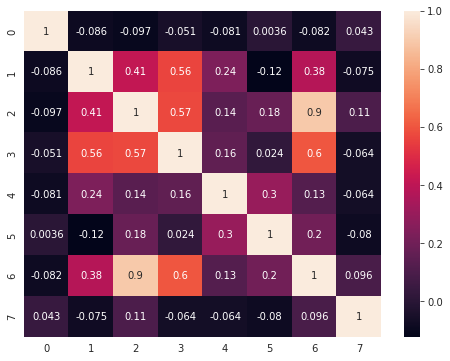

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(nor_df.corr(), annot=True)
plt.show()

In [75]:
pca = PCA(n_components=nor_df.shape[1])
pca.fit(nor_df)

PCA(n_components=8)

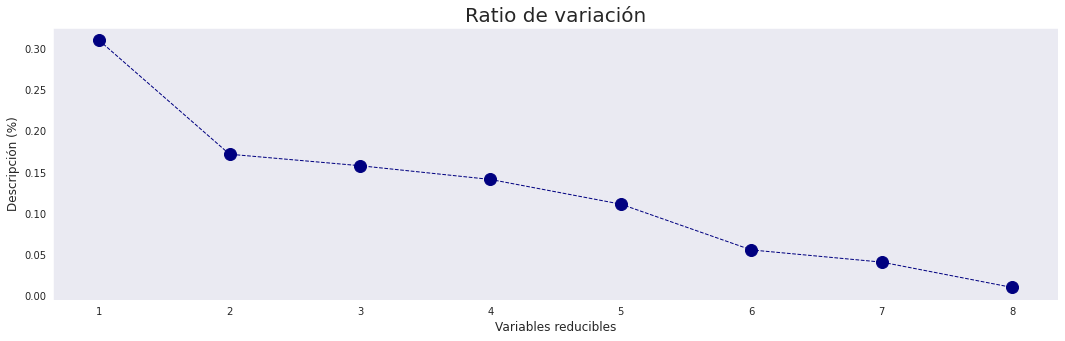

In [77]:
plt.figure(figsize=(18, 5))

plt.title("Ratio de variación", size = 20)
plt.xlabel("Variables reducibles", size = 12,)
plt.ylabel("Descripción (%)", size = 12)

plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ratio_, color="navy", marker='o', linestyle='dashed', linewidth=1, markersize=12)

In [79]:
pca.explained_variance_ratio_[0:4].sum()

0.7816090978497405

In [80]:
pca = PCA(n_components=4)

In [81]:
X_principal = pd.DataFrame(pca.fit_transform(nor_df) )

___

### 5.3 Clustering

In [82]:
X_principal

,0,1,2,3
0,-0.427855,-0.168220,0.468940,-0.634392
1,0.989623,0.088453,-0.003510,-0.348825
2,0.458633,0.626894,0.658711,0.139170
3,0.492588,0.315693,0.507002,-0.055070
4,-0.423608,-0.462842,0.515951,-0.470790
...,...,...,...,...
3564,-0.588126,-0.454085,-0.121065,0.421839
3565,-0.580617,0.244478,-0.654125,0.112372
3566,-0.446390,0.245586,-0.688558,-0.158547
3567,-0.382911,0.623261,-0.502547,0.347334


In [83]:
def ordena(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [84]:
# Promedio del cluster sobre 15 ensayos  

n_clusters=np.arange(2, 11)
sils=[]
err_sils=[]
vueltas=15

for n in n_clusters:
    tmp_sil=[]
    for _ in range(vueltas):
        gmm=GaussianMixture(n, n_init=2).fit(X_principal) 
        labels=gmm.predict(X_principal)
        sil=metrics.silhouette_score(X_principal, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(ordena(np.array(tmp_sil), int(vueltas/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    err_sils.append(err)

Text(0, 0.5, 'Puntaje')

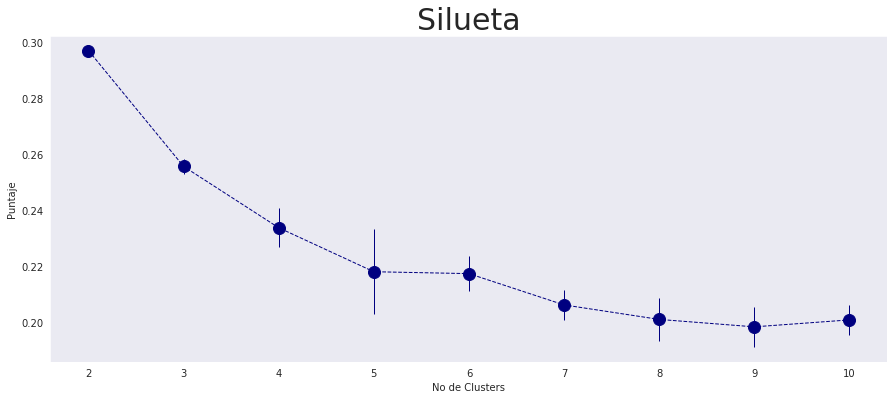

In [85]:
plt.figure(1, figsize = (15 ,6))
plt.errorbar(n_clusters, sils, yerr=err_sils,label='BIC', color='navy', marker='o', linestyle='dashed', linewidth=1, markersize=12)
plt.title('Silueta', fontsize=20,  size = 30)
plt.xticks(n_clusters)
plt.xlabel('No de Clusters')
plt.ylabel('Puntaje')

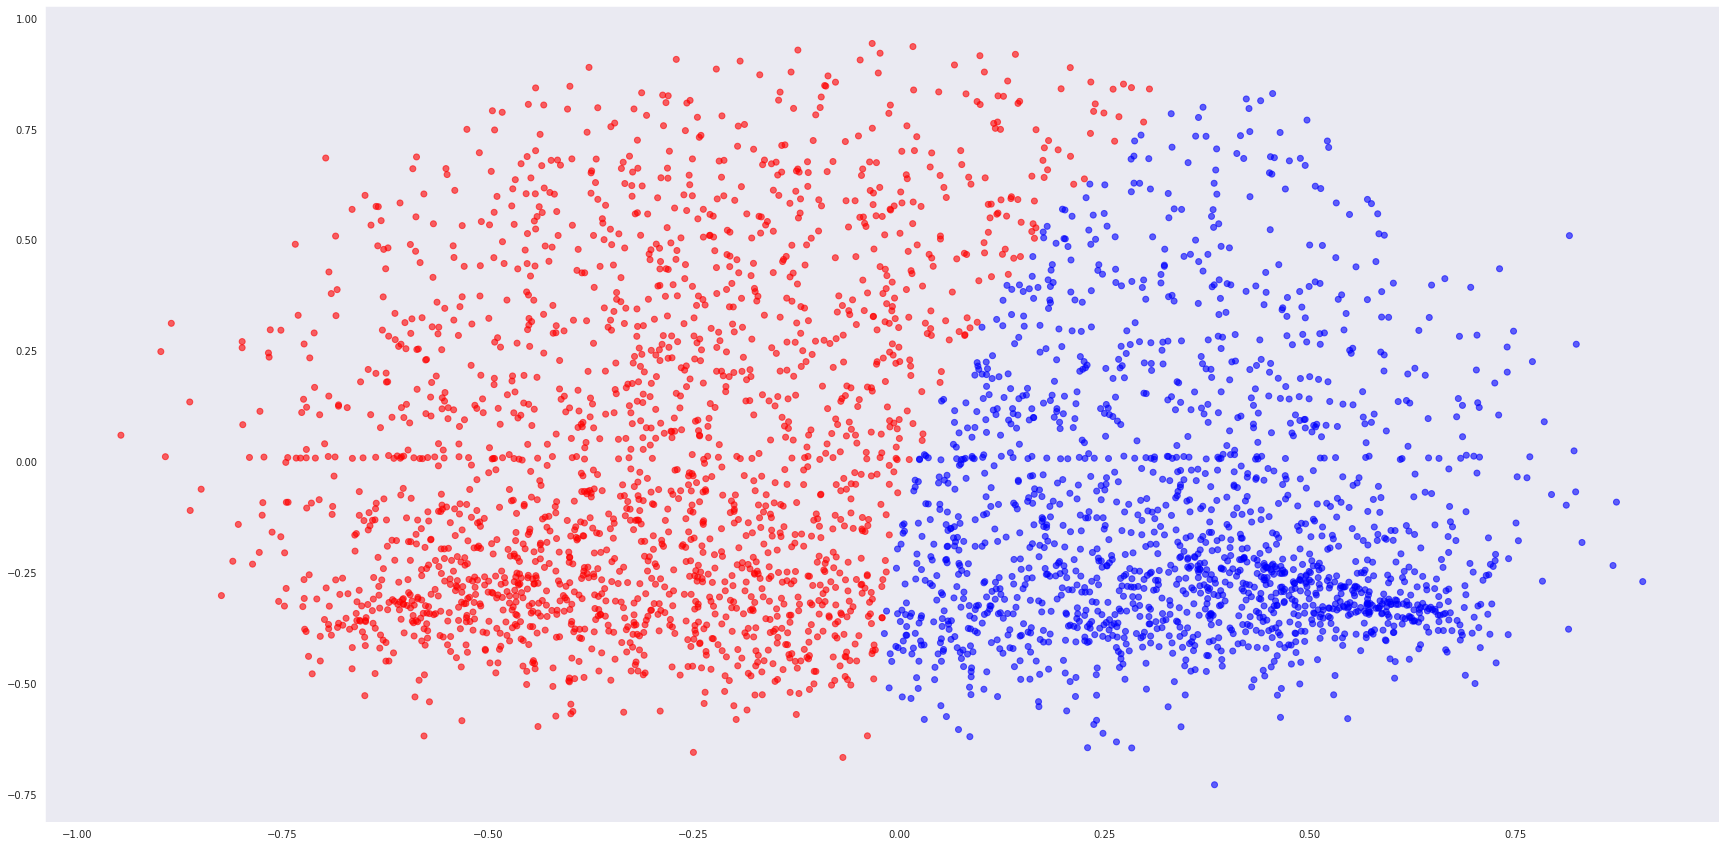

In [97]:
plt.figure(1, figsize = (30 , 15))
plt.scatter(nor_df[0], nor_df[1], c = GaussianMixture(n_components = 2).fit_predict(nor_df[[0,1]]), cmap=plt.cm.bwr, alpha = 0.6) 
plt.show() 

In [89]:
consulta['Cluster'] = GaussianMixture(n_components = 2).fit_predict(X_principal)

In [90]:
consulta.head(11)

,level_0,budget,genres,keywords,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,cast,director,production,prod_countries,year,Cluster
0,0,2300000,"[Thriller, Drama]","[island, airplane, survival]",After their plane crashes off the coast of a d...,2.713171,0,97.0,Survive at any cost.,Eden,5.6,19,"[Jessica Lowndes, Ethan Peck, Diego Boneta]",Shyam Madiraju,"[Ombra Films, Perlapartment Pictures, Gobsmack]","[Malaysia, Spain, United States of America]",2015.0,1
1,1,40000000,"[Action, Drama, Thriller]","[war, survival, navy seal]","Based on the failed June 28, 2005 mission ""Ope...",37.084384,149295601,121.0,Based on True Acts of Courage,Lone Survivor,7.4,1526,"[Mark Wahlberg, Taylor Kitsch, Emile Hirsch]",Peter Berg,"[Universal Pictures, Weed Road Pictures, Herri...",[United States of America],2013.0,0
2,2,32000000,"[Action, Adventure, Drama]","[rugby, stranded, survival]","The amazing, true story of a Uruguayan rugby t...",14.488510,36733909,120.0,They survived the impossible...by doing the un...,Alive,6.7,374,"[Ethan Hawke, Vincent Spano, Josh Hamilton]",Frank Marshall,"[Paramount Pictures, Touchstone Pictures]",[United States of America],1993.0,0
3,3,65000000,[Drama],"[american football, 1970s, trainer]",When a plane crash claims the lives of members...,8.629665,43545364,124.0,From the ashes we rose.,We Are Marshall,6.7,186,"[Matthew McConaughey, Matthew Fox, Anthony Mac...",McG,"[Legendary Pictures, Thunder Road Pictures, Wo...",[United States of America],2006.0,0
4,4,0,"[Thriller, Horror]","[friends, remote island, woman director]",Three childhood friends set aside their person...,7.207051,0,83.0,Not every island is a paradise.,Black Rock,4.9,78,"[Kate Bosworth, Lake Bell, Jay Paulson]",Katie Aselton,"[Submarine Entertainment Distributors, LD Ente...",[United States of America],2012.0,1
5,5,5000000,"[Horror, Mystery]","[island, party, murder]",A group of eight college friends gather togeth...,8.190888,0,89.0,Childish pranks turn into a bloody battle for ...,April Fool's Day,5.8,73,"[Deborah Foreman, Thomas F. Wilson, Lloyd Berry]",Fred Walton,"[Paramount Pictures, Hometown Films, YCTM]","[Canada, United States of America]",1986.0,1
6,6,0,"[Thriller, Horror]",[possession],"During an all-night, drug-fueled party at an a...",3.619167,0,91.0,nederlands,Backmask,4.7,79,"[Stephen Lang, Kelly Blatz, Brittany Curran]",Marcus Nispel,"[GO Productions, Vicarious Entertainment, Bloo...",[United States of America],2015.0,1
7,7,25000000,"[Action, Drama, Thriller]","[alcohol, isolation, wolf]",An oil drilling team struggles to survive afte...,48.552871,77278331,117.0,Live or Die on This Day,The Grey,6.4,1451,"[Liam Neeson, Dermot Mulroney, Frank Grillo]",Joe Carnahan,"[Scott Free Productions, 1984 Private Defense ...","[Canada, United States of America]",2012.0,0
8,8,2700000,"[Drama, Romance]","[paris, journalist, dialogue]",Nine years ago two strangers met by chance and...,14.799323,15992615,80.0,What if you had a second chance with the one t...,Before Sunset,7.6,718,"[Ethan Hawke, Julie Delpy, Vernon Dobtcheff]",Richard Linklater,"[Castle Rock Entertainment, Detour Film Produc...",[United States of America],2004.0,0
9,9,20000000,"[Drama, Fantasy]","[shakespeare, sword, island]",An adaptation of the play by William Shakespea...,3.620537,346594,110.0,,The Tempest,6.0,31,"[Helen Mirren, Felicity Jones, Reeve Carney]",Julie Taymor,"[Miramax Films, Touchstone Pictures]",[United States of America],2010.0,1


In [91]:
consulta[consulta['Cluster'] == 1].head(11)

,level_0,budget,genres,keywords,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count,cast,director,production,prod_countries,year,Cluster
0,0,2300000,"[Thriller, Drama]","[island, airplane, survival]",After their plane crashes off the coast of a d...,2.713171,0,97.0,Survive at any cost.,Eden,5.6,19,"[Jessica Lowndes, Ethan Peck, Diego Boneta]",Shyam Madiraju,"[Ombra Films, Perlapartment Pictures, Gobsmack]","[Malaysia, Spain, United States of America]",2015.0,1
4,4,0,"[Thriller, Horror]","[friends, remote island, woman director]",Three childhood friends set aside their person...,7.207051,0,83.0,Not every island is a paradise.,Black Rock,4.9,78,"[Kate Bosworth, Lake Bell, Jay Paulson]",Katie Aselton,"[Submarine Entertainment Distributors, LD Ente...",[United States of America],2012.0,1
5,5,5000000,"[Horror, Mystery]","[island, party, murder]",A group of eight college friends gather togeth...,8.190888,0,89.0,Childish pranks turn into a bloody battle for ...,April Fool's Day,5.8,73,"[Deborah Foreman, Thomas F. Wilson, Lloyd Berry]",Fred Walton,"[Paramount Pictures, Hometown Films, YCTM]","[Canada, United States of America]",1986.0,1
6,6,0,"[Thriller, Horror]",[possession],"During an all-night, drug-fueled party at an a...",3.619167,0,91.0,nederlands,Backmask,4.7,79,"[Stephen Lang, Kelly Blatz, Brittany Curran]",Marcus Nispel,"[GO Productions, Vicarious Entertainment, Bloo...",[United States of America],2015.0,1
9,9,20000000,"[Drama, Fantasy]","[shakespeare, sword, island]",An adaptation of the play by William Shakespea...,3.620537,346594,110.0,,The Tempest,6.0,31,"[Helen Mirren, Felicity Jones, Reeve Carney]",Julie Taymor,"[Miramax Films, Touchstone Pictures]",[United States of America],2010.0,1
10,10,0,[Drama],[sport],"Based on a true story, this film tells the tal...",2.013405,0,101.0,,The Game of Their Lives,5.8,14,"[Gerard Butler, Wes Bentley, Gavin Rossdale]",David Anspaugh,"[Bristol Bay Productions, Baldwin Entertainmen...",[United States of America],2005.0,1
15,15,0,"[Action, Adventure, Science Fiction]","[martial arts, post-apocalyptic, sport]",Set in a futuristic world where the only sport...,6.416780,882290,100.0,When juggers play there is only one way to liv...,The Blood of Heroes,5.9,31,"[Rutger Hauer, Joan Chen, Delroy Lindo]",David Webb Peoples,"[Handistom Investment, Kings Road Entertainmen...","[United States of America, Australia]",1989.0,1
16,16,0,"[Action, Thriller]",[],A one-man army comes to the rescue of the Unit...,4.192064,0,107.0,America wasn't ready...but HE was!,Invasion U.S.A.,5.3,49,"[Chuck Norris, Richard Lynch, Melissa Prophet]",Joseph Zito,[Cannon Films],[United States of America],1985.0,1
19,19,0,"[Horror, Thriller]","[witch, independent film, curse]",Based on the true events of the only case in U...,7.436315,0,83.0,Possession Knows No Bounds,An American Haunting,5.3,142,"[Donald Sutherland, Sissy Spacek, ""James DArcy""]",Courtney Solomon,"[Media Pro Pictures, Allan Zeman Productions, ...","[United Kingdom, United States of America]",2005.0,1
20,20,4000000,"[Horror, Science Fiction]",[zombie],"On an island off the coast of North America, l...",10.789912,0,90.0,Death isn't what it used to be.,Survival of the Dead,4.6,116,"[Alan van Sprang, Kenneth Welsh, Kathleen Munroe]",George A. Romero,"[Devonshire Productions, Artfire Films, New Ro...","[Canada, United States of America]",2010.0,1


## 6 Conclusiones

> Implementación basada en lo aprendido durante el curso:
 
Modelado a través de variables de texto y numéricas, con base en 
 
* **Semejanza**. A partir del nombre de la película, su reparto, directores (entre otros campos descriptivos), se crea un índice por similitud vectorial coseno, a partir del conteo de palabras clave y procesamiento de lenguaje natural.
 
* **Distancia**. Clásica (o euclidiana) entre observaciones con un proceso de clustering GMM de 2 segmentos (derivado a la alta densidad). Aplicación sobre el índice de semejanza y el resto de variables numéricas.
 
Optimización de la ingesta del modelo a través de **análisis de componentes principales**:
 
* El 80% del comportamiento en las variables numéricas se describen con 4 componentes, reducción de la mitad de variables.

